# MPlots - Eamonn
> Following Eammon exsamples of Motif discovery
> Section VI.C - Figure 11: Insect pest feeding on a plant

## Insects

### Download  & convert dataset

In [1]:
import os
import dvats.mplots as mplots
import pandas as pd
from dvats.load import *

%matplotlib inline

In [2]:
gd_mat = mplots.GD_Mat(**mplots.eamonn_drive_mplots['insects0'])
print(gd_mat)
gd_mat.unzip_mat('all')
print(gd_mat)
gd_mat.mat2csv(0)
print(gd_mat)
display(gd_mat.mats_df[0].head(5))

FileID: 1qq1z2mVRd7PzDqX0TDAwY7BcWVjnXUfQ
Data path: /home/macu/data
zip path: /home/macu/data/InsectData-fig11.zip
mat_files: None
num_mats: 0
FileID: 1qq1z2mVRd7PzDqX0TDAwY7BcWVjnXUfQ
Data path: /home/macu/data
zip path: /home/macu/data/InsectData-fig11.zip
mat_files: ['Insect_one_million.mat']
num_mats: 1
Mat2csv case /home/macu/data/Insect_one_million.mat
FileID: 1qq1z2mVRd7PzDqX0TDAwY7BcWVjnXUfQ
Data path: /home/macu/data
zip path: /home/macu/data/InsectData-fig11.zip
mat_files: ['Insect_one_million.mat']
num_mats: 1


,Insect_one_million
0,0.236820
1,0.236820
2,0.238040
3,0.206300
4,0.026855


In [3]:
df = gd_mat.mats_df[0]
print(df.shape)
display(df.head(5))

(1000000, 1)


,Insect_one_million
0,0.236820
1,0.236820
2,0.238040
3,0.206300
4,0.026855


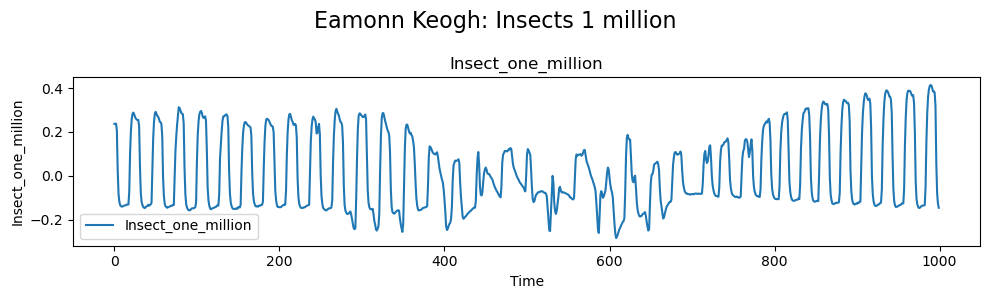

In [4]:
mplots.plot_dataFrame("Eamonn Keogh: Insects 1 million", df[:1000])

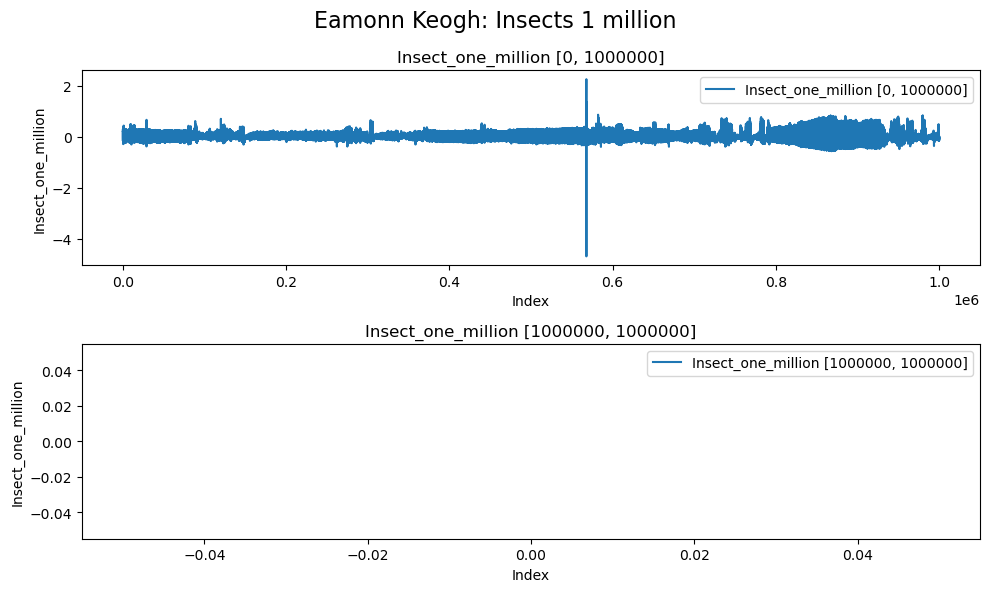

In [5]:
mplots.plot_dataFrame_variable_with_intervals("Eamonn Keogh: Insects 1 million", df, 0, 1000000)

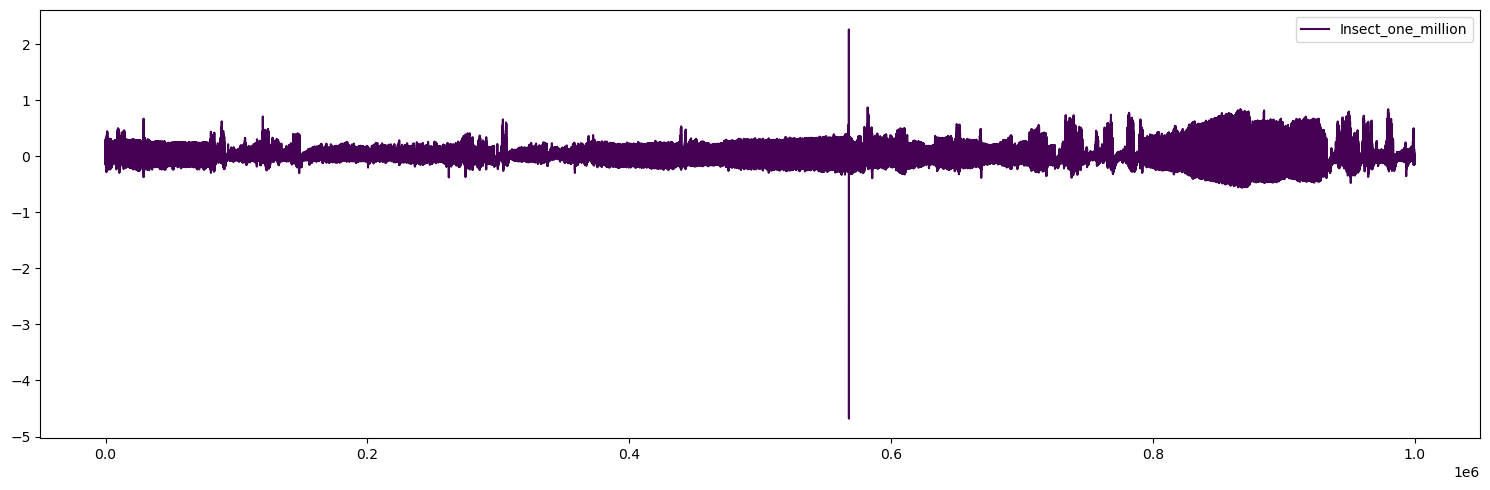

None

In [6]:
mplots.df_plot_colored_variables(df)

In [7]:
#mplots.plot_df_with_intervals_and_colors("Eamonn | Insects One Million", df)

### Setup frequency as in 01

In [8]:
df = infer_or_inject_freq(
    df, 
    injected_freq = '1s', 
    start_date = None, 
    format='%Y-%m-%d %H:%M:%S'
)
print(df.index.freq)

<Second>


In [9]:
df

,Insect_one_million
1970-01-01 00:00:00,0.236820
1970-01-01 00:00:01,0.236820
1970-01-01 00:00:02,0.238040
1970-01-01 00:00:03,0.206300
1970-01-01 00:00:04,0.026855
...,...
1970-01-12 13:46:35,0.014648
1970-01-12 13:46:36,0.030518
1970-01-12 13:46:37,0.034180
1970-01-12 13:46:38,0.013428


## Find a motif using SCAMP

In [10]:
import pyscamp as scamp

In [11]:
import dvats.memory as mem
mem.gpu_memory_status

<function dvats.memory.gpu_memory_status(device=0)>

In [12]:
# Allows checking if pyscamp was built with CUDA and has GPU support.
has_gpu_support = scamp.gpu_supported()
has_gpu_support

True

In [13]:
m = 187
log_time = mplots.Time()
log_time.start()
mp, index = scamp.selfjoin(df['Insect_one_million'], m)
log_time.end()
print(log_time)

Time Start: 1709665330.8181984, Time End: 1709665353.1792831, Duration: 22.361084699630737


In [14]:
mp_sorted = mplots.np.argsort(mp)
motif_idx = mp_sorted[0]
print(f"The motif is alocated at index {motif_idx}")

The motif is alocated at index 538137


In [15]:
nearest_neighbor_idx = index[motif_idx]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 524794


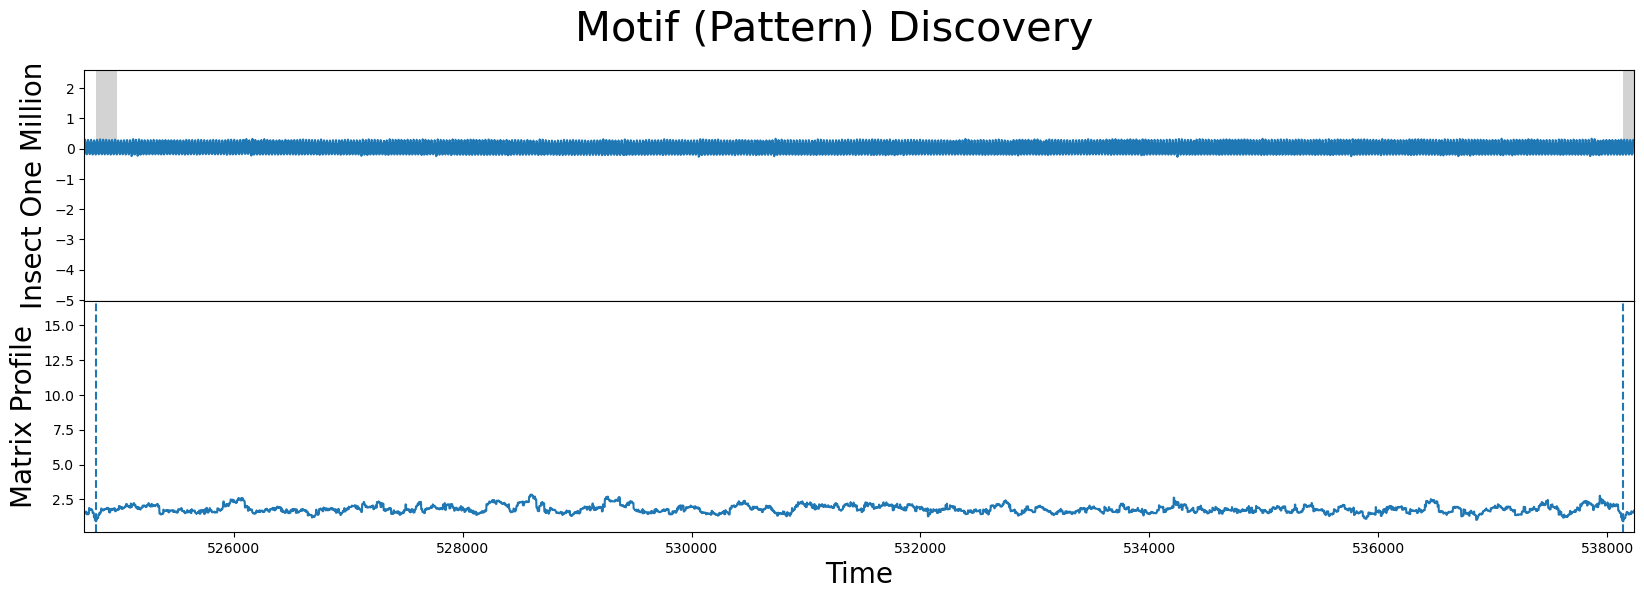

In [16]:
mplots.plot_motif(df, motif_idx, nearest_neighbor_idx, "Insect_one_million", "Insect One Million", 100, m, mp)

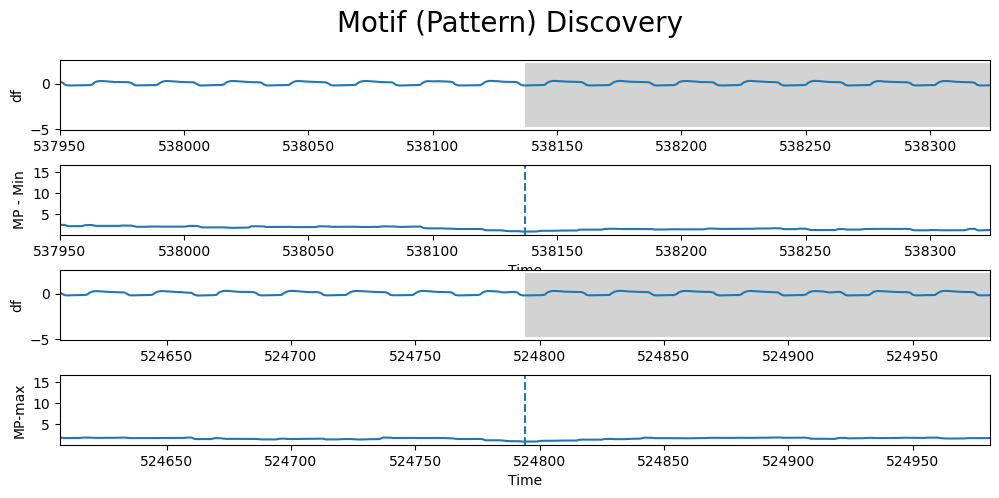

In [17]:
mplots.plot_motif_separated(df, motif_idx, nearest_neighbor_idx, "Insect_one_million", "df", 10, m, mp)

No me ha salido lo esperado. Intentemos sacar el mismo motif que en el ejemplo

In [18]:
min = 34.5
seconds = int (min * 60)

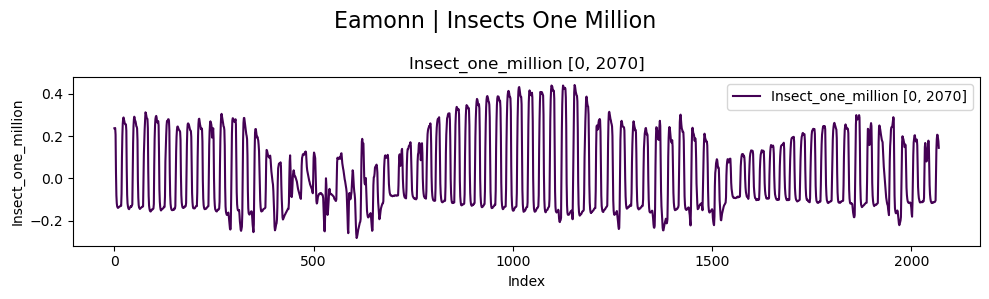

In [19]:
mplots.plot_df_with_intervals_and_colors("Eamonn | Insects One Million", df[:seconds])

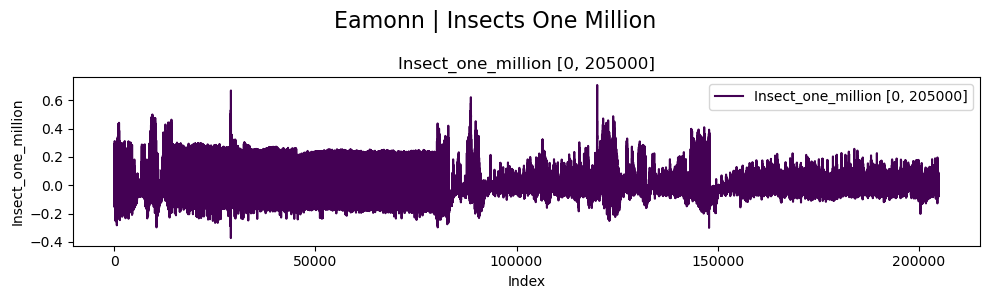

In [20]:
mplots.plot_df_with_intervals_and_colors("Eamonn | Insects One Million", df[:205000], 300000)

In [21]:
#plot_df_with_intervals_and_colors("Eamonn | Insects One Million", df[:205000])

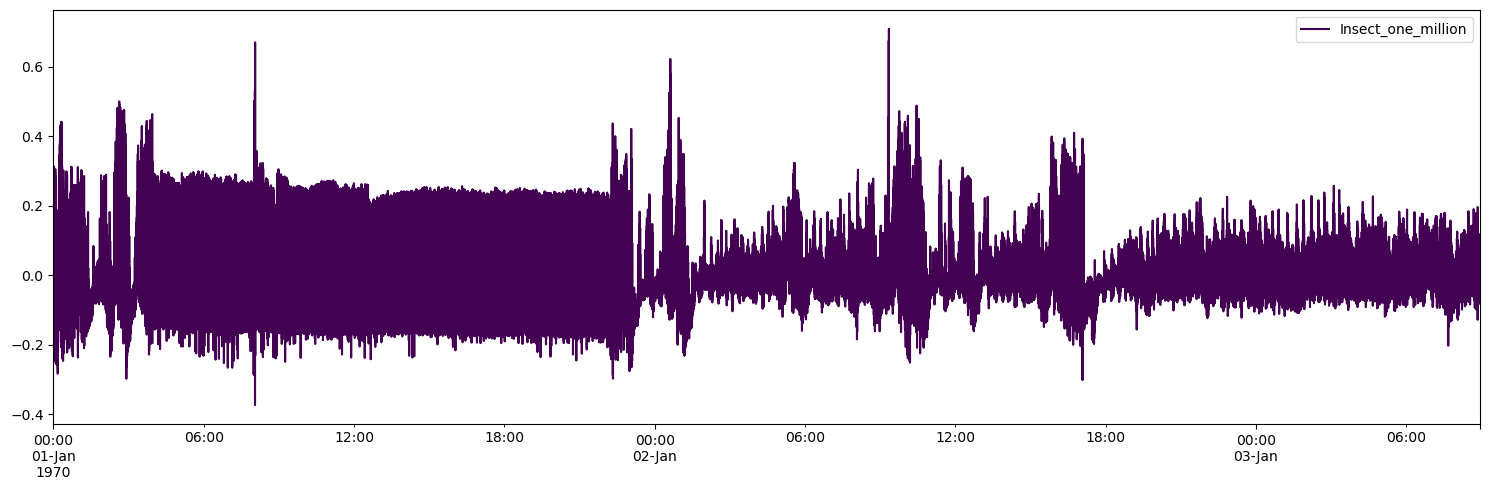

None

In [22]:
mplots.df_plot_colored_variables(df[:205000])

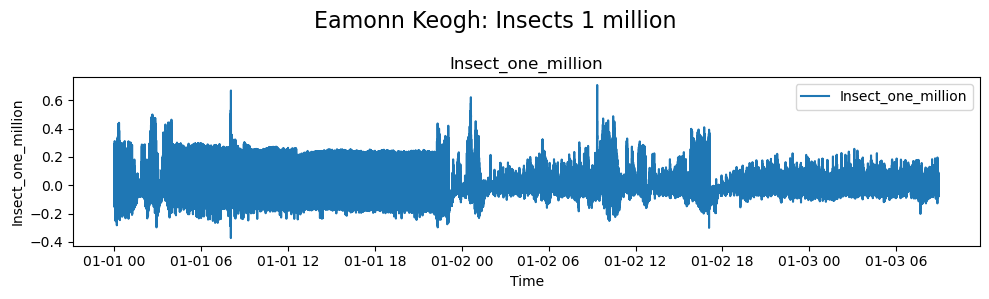

In [23]:
mplots.plot_dataFrame("Eamonn Keogh: Insects 1 million", df[:205000])

Tratando de descargar de nuevo el dataset... Pero ahora me pide solicitar acceso. ¿Me habré equivocado de dataset?

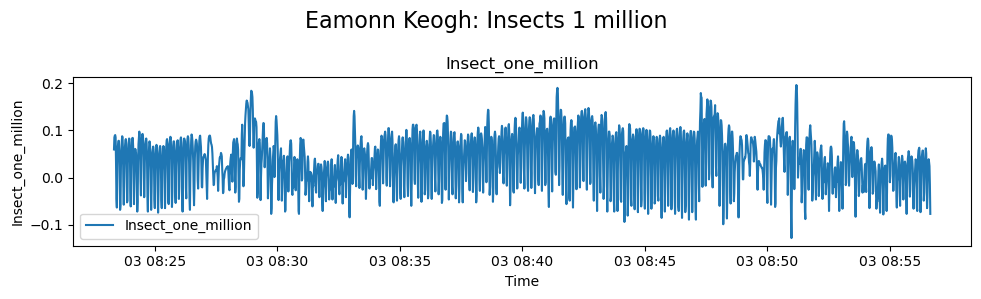

In [28]:
mplots.plot_dataFrame("Eamonn Keogh: Insects 1 million", df[203000:205000])

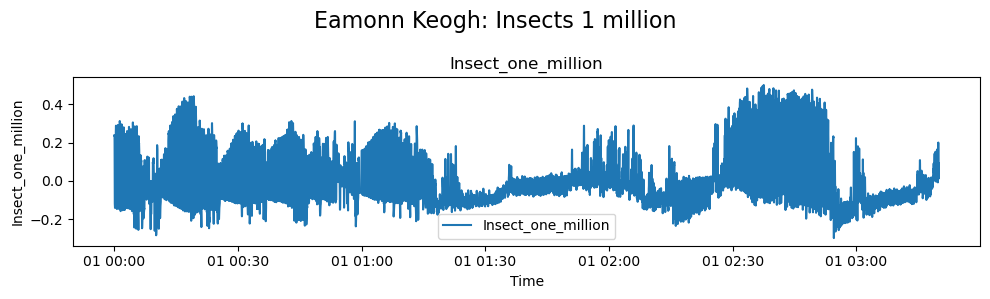

In [29]:
mplots.plot_dataFrame("Eamonn Keogh: Insects 1 million", df[:12000])

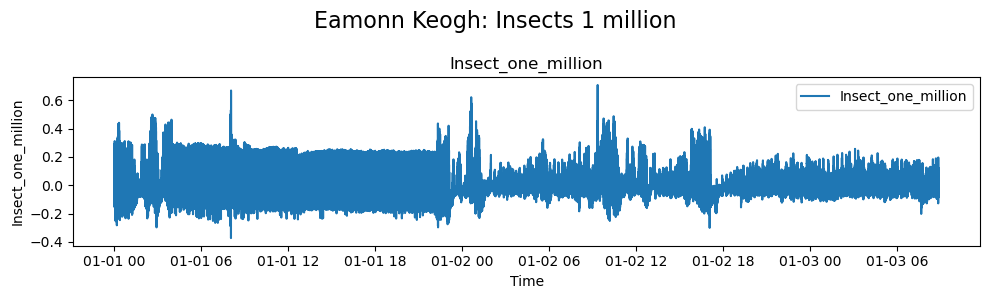

In [33]:
mplots.plot_dataFrame("Eamonn Keogh: Insects 1 million", df[:204800])

https://link.springer.com/article/10.1007/s10618-021-00740-0
-> https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005158


In [36]:
#Intentando con otra fuente (DYRA)
! wget https://datadryad.org/stash/dataset/doi:10.5061/dryad.4931c/stash/downloadZip/doi_10_5061_dryad_4931c__v20170930.zip

--2024-03-05 19:45:01--  https://datadryad.org/stash/dataset/doi:10.5061/dryad.4931c/stash/downloadZip/doi_10_5061_dryad_4931c__v20170930.zip
Resolving datadryad.org (datadryad.org)... 54.148.196.161, 54.191.13.160
Connecting to datadryad.org (datadryad.org)|54.148.196.161|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-03-05 19:45:02 ERROR 404: Not Found.



In [110]:
import requests

# Endpoint de ejemplo de la API de Dryad
#url = 'https://datadryad.org/api/v2/datasets'
doi = "10.5061/dryad.4931c"
url_prefix='https://datadryad.org'
url = url_prefix+f"/api/v2/datasets/doi%3A{doi.replace('/', '%2F')}"

# Realizar una solicitud GET al endpoint
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Procesar la respuesta, que generalmente es en formato JSON
    data = response.json()
   # print(data)
else:
    print(f"Error al realizar la solicitud: {response.status_code}")

In [111]:
url = url_prefix+data['_links']['stash:download']['href']

In [119]:
url

'https://datadryad.org/api/v2/datasets/doi%3A10.5061%2Fdryad.4931c/download'

In [125]:
# URL de descarga
url = "https://datadryad.org/api/v2/datasets/doi%3A10.5061%2Fdryad.4931c/download"

# Realizar la solicitud GET
response = requests.get(url, stream=True)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Especificar la ruta donde guardarás el archivo
    path_to_save = "/home/macu/data/"

    # Abrir un archivo para escribir el contenido binario
    with open(path_to_save, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192): 
            # Escribir el contenido en el archivo
            f.write(chunk)
    print("Archivo descargado con éxito.")
else:
    print(f"Error al descargar el archivo: {response.status_code}")


Error al descargar el archivo: 500


In [113]:
response = requests.get(url, stream=True)
# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Abrir un archivo local para guardar el contenido descargado
    with open('dataset.zip', 'wb') as file:
        for chunk in response.iter_content(chunk_size=128):
            file.write(chunk)
    print("Descarga completada con éxito.")
else:
    print(f"Error al descargar el archivo: {response.status_code}")

Error al descargar el archivo: 500


In [109]:
! ls dataset.zip

ls: cannot access 'dataset.zip': No such file or directory


In [85]:
! file dataset.zip

dataset.zip: cannot open `dataset.zip' (No such file or directory)


In [86]:
! file ~/data/dataset.zip

/home/macu/data/dataset.zip: JSON data


In [116]:
#cat ~/data/dataset.zip

In [117]:
import shutil
orig_path = 'dataset.zip' 
dst_path = os.path.expanduser('~/data/dataset.zip')

shutil.move(orig_path, dst_path)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.zip'

In [118]:
with zipfile.ZipFile(dst_path, 'r') as zip_ref:
    zip_ref.extractall()

BadZipFile: File is not a zip file

In [66]:
import zipfile
def unzip_dyrac(all_one, zip_path, extract_path, case = '', print_flag = True):
    if print_flag: print("--> Unzip_mat", all_one, zip_path, extract_path, case, print_flag)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        print("Aqui")
        mat_files = [file for file in zip_ref.namelist() if file.endswith('.mat') and not file.startswith('__MACOSX/')]
        if print_flag: print(mat_files)
        if all_one == "all":
            # Extract
            for file in mat_files:
                zip_ref.extract(file, extract_path)
            return f"{mat_files} extracted to {extract_path}"
        
        elif all_one == "one":
            if case == "":
                # Extract first .mat
                zip_ref.extract(mat_files[0], extract_path)
                return f"{mat_files[0]} extracted to  {extract_path}"
            else:
                # Extract <case>.mat
                mat_file = next((file for file in mat_files if case in file), None)
                if mat_file:
                    zip_ref.extract(mat_file, extract_path)
                    return f"{mat_file} extracted to {extract_path}"
                else:
                    return "None "+case+".mat found."
        else:
            return "First parameter must be 'all' or 'one'."
        if print_flag: print("unzip_path -->")

In [70]:
unzip_dyrac('all', path, '~/data/', '', True)

--> Unzip_mat all /home/macu/data/dataset.zip ~/data/  True


BadZipFile: File is not a zip file

In [126]:
df_dyrac_0 = pd.read_csv('~/data/dyrac/Data1/04_Lab_FD_031114.csv')

/tmp/ipykernel_95253/1856112122.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dyrac_0 = pd.read_csv('~/data/dyrac/Data1/04_Lab_FD_031114.csv')


In [127]:
df_dyrac_0.head(5)

,Unnamed: 0,sec,Volts,Label,Variety,RN
0,1,2173.14,0.384520,np,Flying Dragon,217315
1,2,2173.15,0.366210,np,Flying Dragon,217316
2,3,2173.16,0.327150,np,Flying Dragon,217317
3,4,2173.17,0.231930,np,Flying Dragon,217318
4,5,2173.18,-0.006104,np,Flying Dragon,217319


In [128]:
df_dyrac_0.shape

(1574527, 6)

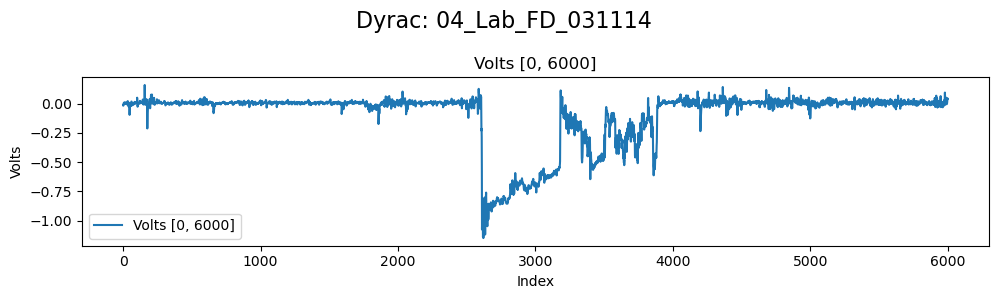

In [158]:
#mplots.plot_dataFrame("Dyrac: 04_Lab_FD_031114.csv", df_dyrac_0[:204800])
#mplots.plot_dataFrame_variable_with_intervals("Dyrac: 04_Lab_FD_031114", df_dyrac_0[380500:440500], 2, 60010)
mplots.plot_dataFrame_variable_with_intervals("Dyrac: 04_Lab_FD_031114", df_dyrac_0[384500:390500], 2, 60010)

In [165]:
df_2 = df_dyrac_0['Volts']
df_2.head(5)

0    0.384520
1    0.366210
2    0.327150
3    0.231930
4   -0.006104
Name: Volts, dtype: float64